# Predicting Vehicle MSRP using Multiple Regression Analysis
#### By: Connor Schultz and Aiden Bull

### 1. Introduction

Intro goes here.



### 2. Data
Data section goes here.


### 3. Analysis Methods
Methods intro goes here.

#### 3.1. Data Preprocessing
Data Preproc goes here.

In [93]:
#HIDDEN
#Centers code cell outputs
from IPython.display import display, HTML
CSS = """
.output {
    align-items: center;
}
"""
HTML('<style>{}</style>'.format(CSS))

In [94]:
#Import required python3 packages
import os
import numpy as np
import pandas as pd
import nbinteract as nbi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [95]:
#Read data in from processed .csv file
#Fully Encoded data: processed using data_cleaner_fe.py
cwd = os.getcwd()
data_fe = pd.read_csv(cwd+"/car_data/fe_cars.csv")
data_fe = data_fe.drop(columns = ['Unnamed: 0'])
#Semi-Encoded data: processed using data_cleaner_se.py
data_se = pd.read_csv(cwd+"/car_data/se_cars.csv")
data_se = data_se.drop(columns = ['Unnamed: 0'])

data = [data_fe, data_se]
#data = [scale(x) for x in data]

print("Fully Encoded Dataframe Dimensions: %s" % str(data_fe.shape))
print("Semi-Encoded Dataframe Dimensions: %s" % str(data_se.shape))

Fully Encoded Dataframe Dimensions: (15808, 938)
Semi-Encoded Dataframe Dimensions: (12873, 64)


In [96]:
#Prepare data for regression analysis
Y_fe, Y_se = data_fe['MSRP'], data_se['MSRP']

X_fe, X_se = data_fe.drop(columns = ['MSRP']), data_se.drop(columns = ['MSRP'])

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, Y_fe, test_size = 0.25)
X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, Y_se, test_size = 0.25)

X_train, X_test = [X_train_fe, X_train_se], [X_test_fe, X_test_se]
y_train, y_test = [y_train_fe, y_train_se], [y_test_fe, y_test_se]

#### 3.2. Least Squares Linear Regression
Linear regression goes here.

In [97]:
#Model Fitting
lin = [LinearRegression().fit(X_train[0], y_train[0]), LinearRegression().fit(X_train[1], y_train[1])]
#Prediction
pred_lin = [lin[0].predict(X_test[0]), lin[1].predict(X_test[1])] 
#Metrics
mae_lin = [mean_absolute_error(y_test[0], pred_lin[0]), mean_absolute_error(y_test[1], pred_lin[1])]
rmse_lin = [np.sqrt(mean_squared_error(y_test[0], pred_lin[0])), np.sqrt(mean_squared_error(y_test[1], pred_lin[1]))]
r2_lin = [r2_score(y_test[0], pred_lin[0]), r2_score(y_test[1], pred_lin[1])]

#### 3.3. Ridge Regression
Ridge regression goes here.

In [98]:
#Model Fitting
ridge = [Ridge(alpha = 0.01).fit(X_train[0], y_train[0]), Ridge(alpha = 0.01).fit(X_train[1], y_train[1])]
#Prediction
pred_ridge = [ridge[0].predict(X_test[0]), ridge[1].predict(X_test[1])] 
#Metrics
mae_ridge = [mean_absolute_error(y_test[0], pred_ridge[0]), mean_absolute_error(y_test[1], pred_ridge[1])]
rmse_ridge = [np.sqrt(mean_squared_error(y_test[0], pred_ridge[0])), np.sqrt(mean_squared_error(y_test[1], pred_ridge[1]))]
r2_ridge = [r2_score(y_test[0], pred_ridge[0]), r2_score(y_test[1], pred_ridge[1])]

#### 3.4. Lasso Regression
lasso regression goes here.

In [99]:
#Model Fitting
lasso = [Lasso(alpha=0.01).fit(X_train[0], y_train[0]), Lasso(alpha=0.01).fit(X_train[1], y_train[1])]
#Prediction
pred_lasso = [lasso[0].predict(X_test[0]), lasso[1].predict(X_test[1])] 
#Metrics
mae_lasso = [mean_absolute_error(y_test[0], pred_lasso[0]), mean_absolute_error(y_test[1], pred_lasso[1])]
rmse_lasso = [np.sqrt(mean_squared_error(y_test[0], pred_lasso[0])), np.sqrt(mean_squared_error(y_test[1], pred_lasso[1]))]
r2_lasso = [r2_score(y_test[0], pred_lasso[0]), r2_score(y_test[1], pred_lasso[1])]

/home/connor/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94531152235.47298, tolerance: 319981552.58536655
  positive)
/home/connor/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1104538908862.5977, tolerance: 819203712.4268847
  positive)


### 3. Results and Discussion

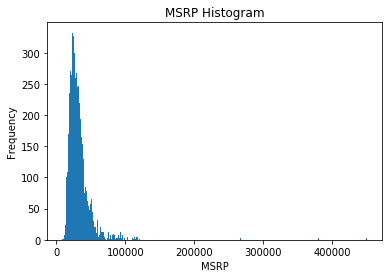

In [100]:
#HIDDEN
plt.hist(Y_fe,bins = 1000)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('MSRP Histogram');


In [101]:
#HIDDEN
data = [["Linear Regression", "Fully Encoded", data_fe.shape, mae_lin[0], rmse_lin[0], r2_lin[0]],
        ["Linear Regression", "Semi-Encoded", data_se.shape, mae_lin[1], rmse_lin[1], r2_lin[1]],                                                                                        ["Ridge Regression", "Fully Encoded", data_fe.shape, mae_ridge[0], rmse_ridge[0], r2_ridge[0]],
        ["Ridge Regression", "Semi-Encoded", data_se.shape, mae_ridge[1], rmse_ridge[1], r2_ridge[1]],
        ["Lasso Regression", "Fully Encoded", data_fe.shape, mae_lasso[0], rmse_lasso[0], r2_lasso[0]],
        ["Lasso Regression", "Semi-Encoded", data_se.shape, mae_lasso[1], rmse_lasso[1], r2_lasso[1]]]                                                                                                                                                                               
columns = ["Model", "Dataset", "Dataframe Dimensions", "Mean Absolute Error", "Root Mean Square Error", "R^2 value"]
pd.DataFrame(data, columns=columns)

,Model,Dataset,Dataframe Dimensions,Mean Absolute Error,Root Mean Square Error,R^2 value
0,Linear Regression,Fully Encoded,"(15808, 938)",5.949375e+07,2.071420e+09,-1.428826e+10
1,Linear Regression,Semi-Encoded,"(12873, 64)",7.496304e+03,1.580306e+04,7.371287e-01
2,Ridge Regression,Fully Encoded,"(15808, 938)",2.737029e+03,4.581137e+03,9.301141e-01
3,Ridge Regression,Semi-Encoded,"(12873, 64)",7.497185e+03,1.580257e+04,7.371451e-01
4,Lasso Regression,Fully Encoded,"(15808, 938)",2.735512e+03,4.585566e+03,9.299789e-01
5,Lasso Regression,Semi-Encoded,"(12873, 64)",7.502310e+03,1.580325e+04,7.371226e-01


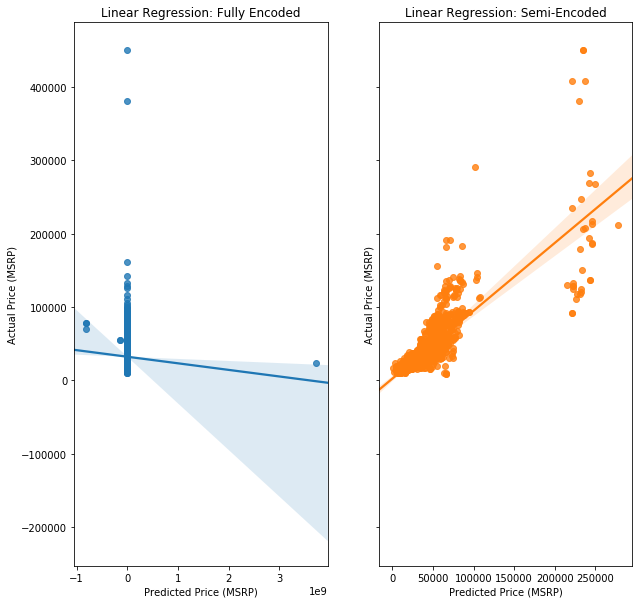

In [88]:
#HIDDEN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharey=True)
sns.regplot(lin[0].predict(X_test[0]), y_test[0], ax = axes[0])
sns.regplot(lin[1].predict(X_test[1]), y_test[1], ax = axes[1])
axes[0].set_title('Linear Regression: Fully Encoded'), axes[1].set_title('Linear Regression: Semi-Encoded')
axes[0].set_xlabel("Predicted Price (MSRP)"), axes[1].set_xlabel("Predicted Price (MSRP)")
axes[0].set_ylabel("Actual Price (MSRP)"), axes[1].set_ylabel("Actual Price (MSRP)")
plt.show();

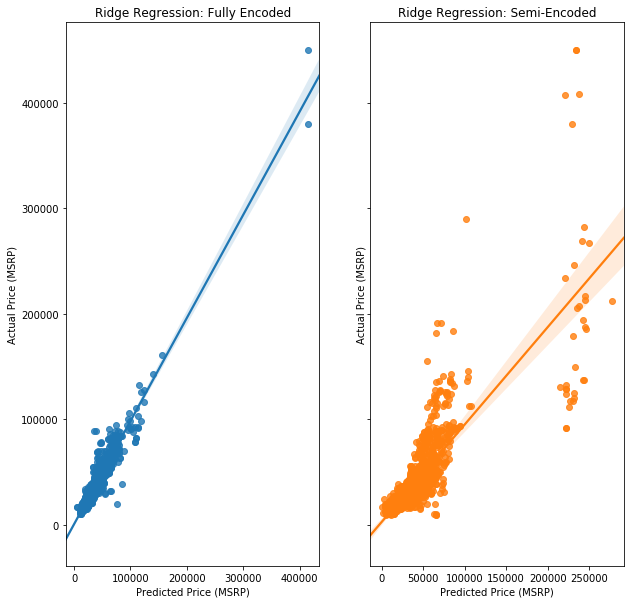

In [89]:
#HIDDEN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharey=True)
sns.regplot(ridge[0].predict(X_test[0]), y_test[0], ax = axes[0])
sns.regplot(ridge[1].predict(X_test[1]), y_test[1], ax = axes[1])
axes[0].set_title('Ridge Regression: Fully Encoded'), axes[1].set_title('Ridge Regression: Semi-Encoded')
axes[0].set_xlabel("Predicted Price (MSRP)"), axes[1].set_xlabel("Predicted Price (MSRP)")
axes[0].set_ylabel("Actual Price (MSRP)"), axes[1].set_ylabel("Actual Price (MSRP)")
plt.show();

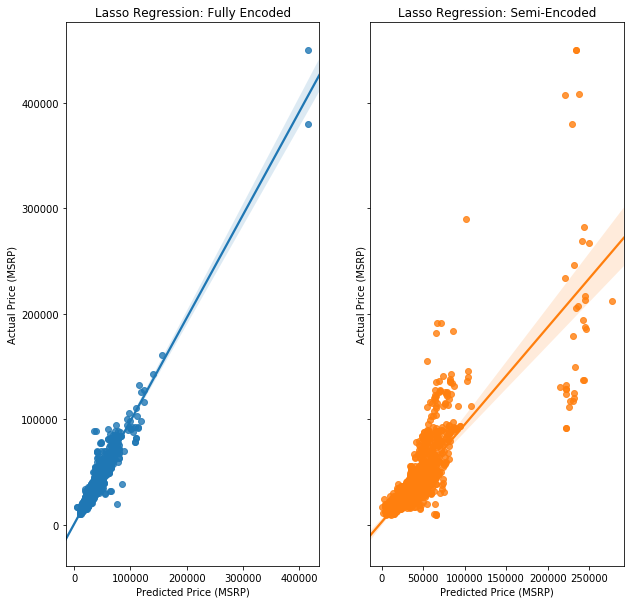

In [90]:
#HIDDEN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharey=True)
f1 = sns.regplot(lasso[0].predict(X_test[0]), y_test[0], ax = axes[0])
f2 = sns.regplot(lasso[1].predict(X_test[1]), y_test[1], ax = axes[1])
axes[0].set_title('Lasso Regression: Fully Encoded'), axes[1].set_title('Lasso Regression: Semi-Encoded')
axes[0].set_xlabel("Predicted Price (MSRP)"), axes[1].set_xlabel("Predicted Price (MSRP)")
axes[0].set_ylabel("Actual Price (MSRP)"), axes[1].set_ylabel("Actual Price (MSRP)")
plt.show();